In [13]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans
from matplotlib import rc
%matplotlib qt5
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
rc('font', **font)

In [2]:
#Generate CSV files for PASCAL voc data set
#!python script_csv_gen_bndbox.py data/pascal_voc/train data/pascal_voc/test train_pascal.csv test_pascal.csv

In [14]:
pascal_train_data = pd.read_csv('annotation_data/train_pascal_voc.csv')
pascal_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\pascal_voc\train\000005.jpg,chair,0.526,0.562667,0.648,0.904000,0.587,0.733333,0.122,0.341333
1,.\data\pascal_voc\train\000005.jpg,chair,0.330,0.704000,0.506,0.992000,0.418,0.848000,0.176,0.288000
2,.\data\pascal_voc\train\000005.jpg,chair,0.010,0.650667,0.134,0.997333,0.072,0.824000,0.124,0.346667
3,.\data\pascal_voc\train\000005.jpg,chair,0.482,0.517333,0.590,0.797333,0.536,0.657333,0.108,0.280000
4,.\data\pascal_voc\train\000005.jpg,chair,0.554,0.496000,0.624,0.586667,0.589,0.541333,0.070,0.090667
5,.\data\pascal_voc\train\000007.jpg,car,0.282,0.150150,1.000,0.990991,0.641,0.570571,0.718,0.840841
6,.\data\pascal_voc\train\000009.jpg,horse,0.138,0.458667,0.540,0.880000,0.339,0.669333,0.402,0.421333
7,.\data\pascal_voc\train\000009.jpg,person,0.300,0.376000,0.458,0.757333,0.379,0.566667,0.158,0.381333
8,.\data\pascal_voc\train\000009.jpg,person,0.570,0.536000,0.654,0.882667,0.612,0.709333,0.084,0.346667
9,.\data\pascal_voc\train\000009.jpg,person,0.516,0.528000,0.594,0.877333,0.555,0.702667,0.078,0.349333


In [4]:
pascal_test_data = pd.read_csv('annotation_data/test_pascal_voc.csv')
pascal_test_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\pascal_voc\train\000001.jpg,dog,0.135977,0.480000,0.552408,0.742000,0.344193,0.611000,0.416431,0.262000
1,.\data\pascal_voc\train\000001.jpg,person,0.022663,0.024000,0.997167,0.996000,0.509915,0.510000,0.974504,0.972000
2,.\data\pascal_voc\train\000002.jpg,train,0.414925,0.400000,0.617910,0.602000,0.516418,0.501000,0.202985,0.202000
3,.\data\pascal_voc\train\000003.jpg,sofa,0.246000,0.413333,0.430000,0.520000,0.338000,0.466667,0.184000,0.106667
4,.\data\pascal_voc\train\000003.jpg,chair,0.478000,0.416000,0.614000,0.546667,0.546000,0.481333,0.136000,0.130667
5,.\data\pascal_voc\train\000004.jpg,car,0.026000,0.766010,0.168000,0.891626,0.097000,0.828818,0.142000,0.125616
6,.\data\pascal_voc\train\000004.jpg,car,0.724000,0.812808,1.000000,0.958128,0.862000,0.885468,0.276000,0.145320
7,.\data\pascal_voc\train\000004.jpg,car,0.470000,0.807882,0.668000,0.923645,0.569000,0.865764,0.198000,0.115764
8,.\data\pascal_voc\train\000004.jpg,car,0.350000,0.805419,0.504000,0.896552,0.427000,0.850985,0.154000,0.091133
9,.\data\pascal_voc\train\000004.jpg,car,0.278000,0.788177,0.378000,0.884236,0.328000,0.836207,0.100000,0.096059


In [5]:
print('Total Bounding Boxes in train dataset: ', pascal_train_data.shape[0])
print('Total Bounding Boxes in test dataset: ', pascal_test_data.shape[0])

Total Bounding Boxes in train dataset:  15662
Total Bounding Boxes in test dataset:  14976


In [6]:
k_vs_iou_data = []

In [7]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.4726212526193348, AvgIou: 0.5273787473806651


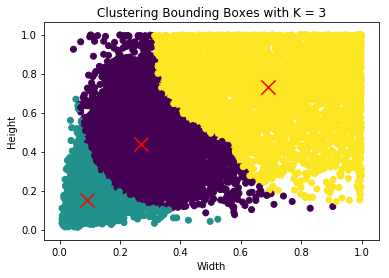

In [8]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [9]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.4158598337288154, AvgIou: 0.5841401662711847


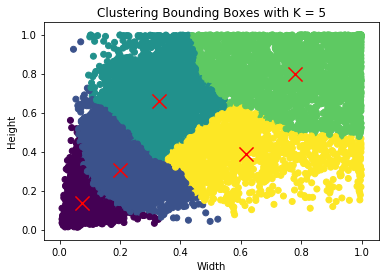

In [10]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [11]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.3720100295763064, AvgIou: 0.6279899704236935


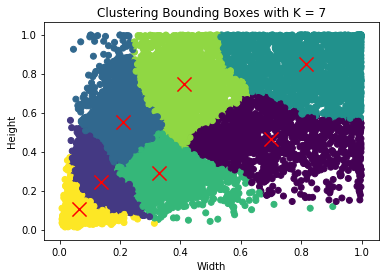

In [12]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [13]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.34104259206023935, AvgIou: 0.6589574079397605


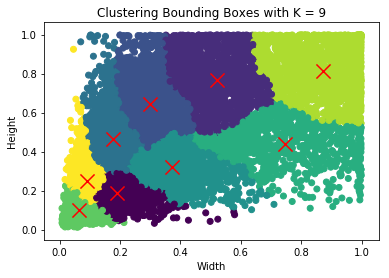

In [14]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [15]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.3207608951440956, AvgIou: 0.6792391048559044


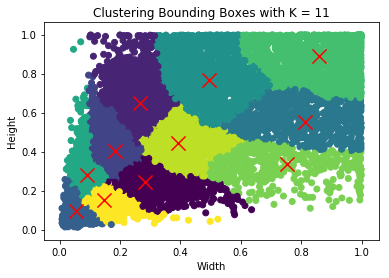

In [16]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [17]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.3023169044245206, AvgIou: 0.6976830955754793


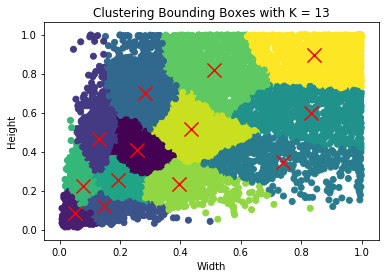

In [18]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [19]:
K = 15
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.28573520688247456, AvgIou: 0.7142647931175257


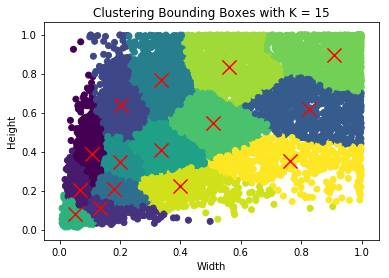

In [20]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [7]:
k_vs_iou_data =[(3, 0.5272683511711749),
 (5, 0.5881793194447844),
 (7, 0.6272229568875494),
 (9, 0.6597511134480362),
 (11, 0.6791186387306813),
 (13, 0.7007609259725441),
 (15, 0.7157899399278393),
 (17, 0.7276327043000521)]
k_vs_iou_data

[(3, 0.5272683511711749),
 (5, 0.5881793194447844),
 (7, 0.6272229568875494),
 (9, 0.6597511134480362),
 (11, 0.6791186387306813),
 (13, 0.7007609259725441),
 (15, 0.7157899399278393),
 (17, 0.7276327043000521)]

In [21]:
K = 17
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.27183341016750007, AvgIou: 0.7281665898324998


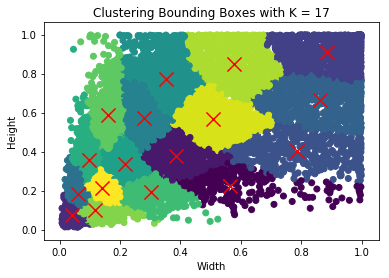

In [22]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [23]:
K = 19
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.2585157651769609, AvgIou: 0.7414842348230392


In [24]:
k_vs_iou_data = np.array(k_vs_iou_data)

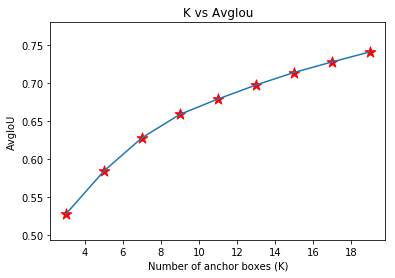

In [25]:
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [15]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans

In [16]:
leaf_train_data = pd.read_csv('annotation_data/train_leaf_data_v2.csv')
leaf_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.579291,0.002809,0.850047,0.466643,0.714669,0.234726,0.270756,0.463834
1,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.208256,0.718048,0.333022,1.000000,0.270639,0.859024,0.124767,0.281952
2,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.163013,0.046348,0.268424,0.314607,0.215718,0.180478,0.105410,0.268258
3,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.127799,0.583919,0.230877,0.795646,0.179338,0.689782,0.103078,0.211728
4,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.334188,0.548806,0.460588,0.660463,0.397388,0.604635,0.126399,0.111657
5,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.458489,0.468750,0.521455,0.639045,0.489972,0.553897,0.062966,0.170295
6,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.295243,0.152739,0.401819,0.294593,0.348531,0.223666,0.106576,0.141854
7,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.488806,0.204003,0.614039,0.321980,0.551423,0.262992,0.125233,0.117978
8,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.895289,0.145365,0.988573,0.614817,0.941931,0.380091,0.093284,0.469452
9,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.000233,0.805478,0.099580,0.936096,0.049907,0.870787,0.099347,0.130618


In [37]:
k_vs_iou_data = []

In [38]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.3999626982887464, AvgIou: 0.6000373017112535


In [39]:
k_means.cluster_vectors.reshape(1,-1)

array([[0.17165484, 0.24305443, 0.37744488, 0.47138934, 0.08540126,
        0.12362178]])

In [26]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.3376126485909448, AvgIou: 0.6623873514090551


In [22]:
k_means.cluster_vectors.reshape(1,-1)

array([[0.17516649, 0.16928615, 0.07627279, 0.10284509, 0.24774856,
        0.36561832, 0.48141216, 0.50308292, 0.10296316, 0.22876379]])

In [27]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.30116305482414846, AvgIou: 0.6988369451758515


In [28]:
k_means.cluster_vectors.reshape(-1)

array([0.44425224, 0.53697614, 0.19498466, 0.17882447, 0.09920358,
       0.23902299, 0.29868894, 0.29535495, 0.11388504, 0.12284915,
       0.06470677, 0.10028476, 0.19446915, 0.42093174])

In [29]:
k_means.cluster_vectors

array([[0.44425224, 0.53697614],
       [0.19498466, 0.17882447],
       [0.09920358, 0.23902299],
       [0.29868894, 0.29535495],
       [0.11388504, 0.12284915],
       [0.06470677, 0.10028476],
       [0.19446915, 0.42093174]])

In [30]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.2756561978474531, AvgIou: 0.7243438021525468


In [31]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.25651584079237005, AvgIou: 0.7434841592076298


In [12]:
k_vs_iou_data = [(3, 0.6501219226310684),
 (5, 0.7079806468459672),
 (7, 0.7333740561286837),
 (9, 0.7669015889730514),
 (11, 0.7814713420298715)]

In [32]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.24518737263509208, AvgIou: 0.754812627364908


C:\Users\siddh\Anaconda3\envs\deeplearning\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\siddh\Anaconda3\envs\deeplearning\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [34]:
k_vs_iou_data = np.array(k_vs_iou_data)
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.xticks(ticks=k_vs_iou_data[:,0])
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [19]:
k_vs_iou_data

array([[ 3.        ,  0.65012192],
       [ 5.        ,  0.70798065],
       [ 7.        ,  0.73337406],
       [ 9.        ,  0.76690159],
       [11.        ,  0.78147134],
       [13.        ,  0.79545163]])